<a href="https://www.kaggle.com/code/komronqayumov/bank-customer-churn-prediction-by-komron?scriptVersionId=238368515" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

/kaggle/input/binaryclassificationwithabankchurndataset/sample_submission.csv
/kaggle/input/binaryclassificationwithabankchurndataset/train.csv
/kaggle/input/binaryclassificationwithabankchurndataset/test.csv


# It Is About Dataset


In [2]:
url="/kaggle/input/binaryclassificationwithabankchurndataset/train.csv"
df = pd.read_csv(url)
df.sample(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6846,6846,15700325.0,Lettiere,549.0,France,Male,38.0,4.0,0.00,2.0,1.0,1.0,143317.43,0.0
4970,4970,15576078.0,Yashina,719.0,Spain,Female,33.0,7.0,0.00,1.0,1.0,1.0,107876.82,1.0
1947,1947,15806447.0,Lombardi,599.0,Spain,Female,43.0,3.0,164902.43,1.0,1.0,0.0,187976.88,1.0
6251,6251,15741032.0,Bancroft,654.0,Spain,Female,40.0,5.0,0.00,1.0,0.0,1.0,140947.05,1.0
14028,14028,15641043.0,Sacco,687.0,Germany,Male,29.0,4.0,111432.13,1.0,1.0,0.0,49816.46,0.0
3771,3771,15802274.0,Maclean,659.0,Spain,Male,36.0,5.0,0.00,2.0,1.0,0.0,174027.30,0.0
10720,10720,15594450.0,Hsieh,707.0,France,Male,34.0,9.0,0.00,2.0,1.0,1.0,163944.17,0.0
4064,4064,15589493.0,Toscani,593.0,France,Male,35.0,6.0,0.00,1.0,1.0,1.0,138380.11,0.0
2170,2170,15726153.0,Brown,718.0,France,Female,42.0,7.0,139859.54,1.0,1.0,1.0,74849.46,0.0
12588,12588,15591822.0,Chin,537.0,Spain,Male,43.0,6.0,128960.21,1.0,1.0,1.0,55424.24,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [4]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


# Drop low corr¶


In [5]:
X = df.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']


# Drop low corr



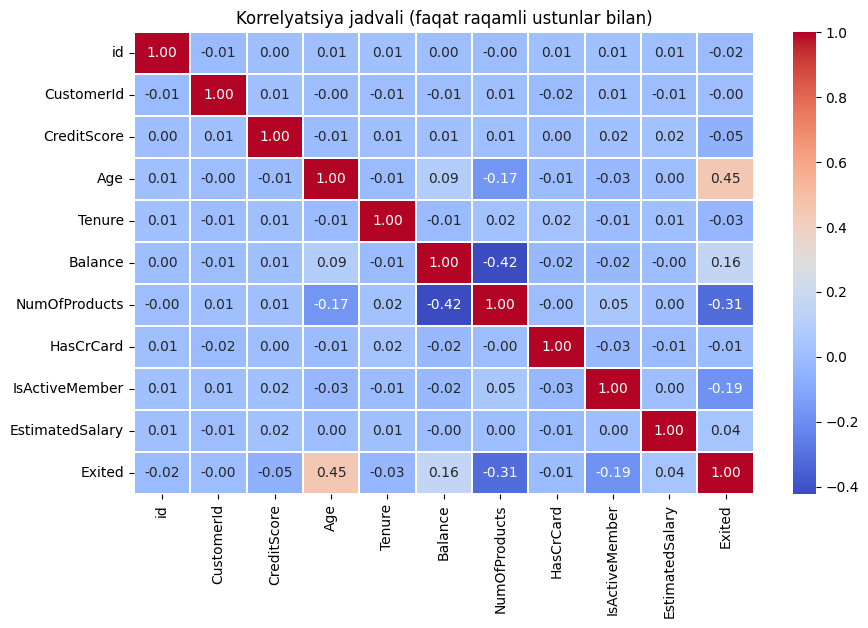

In [6]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Korrelyatsiya jadvali
corr_matrix = numeric_df.corr()



plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title("Korrelyatsiya jadvali (faqat raqamli ustunlar bilan)")
plt.show()

df.hist(bins=50, figsize=(15 , 10))
plt.show()


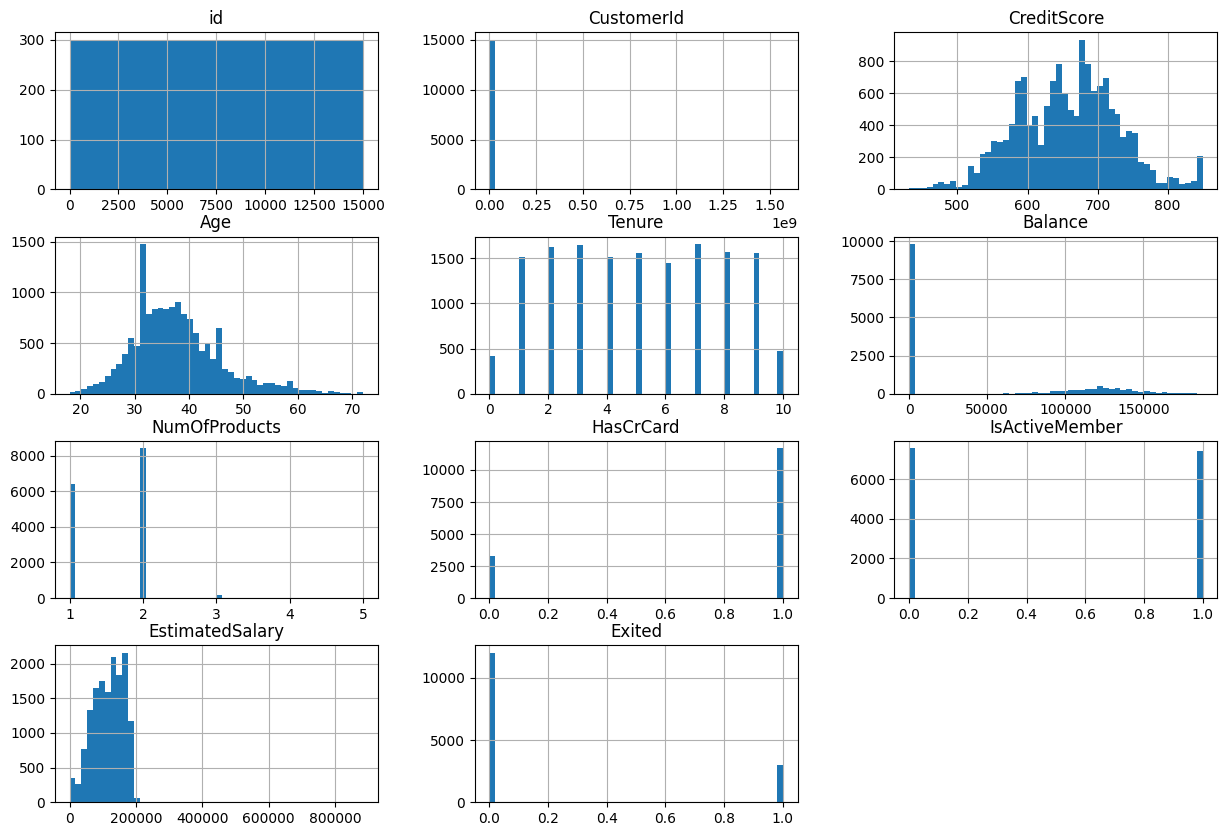

In [7]:
df.hist(bins=50, figsize=(15 ,10))
plt.show()

In [8]:
# Categorical ustunlarni aniqlaymiz
categorical_cols = X.select_dtypes(include='object').columns

# Label encoding
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [9]:
# Yangi foydali ustunlar yaratamiz
X['AgeBalanceRatio'] = X['Balance'] / (X['Age'] + 1)
X['IsSenior'] = (X['Age'] > 50).astype(int)
X['HasHighBalance'] = (X['Balance'] > 100000).astype(int)
X['ProductsPerYear'] = X['NumOfProducts'] / (X['Tenure'] + 1)
X['CreditScorePerProduct'] = X['CreditScore'] / (X['NumOfProducts'] + 1)
X['Age_Products_Ratio'] = X['Age'] / (X['NumOfProducts'] + 1)
X['Products_Per_Age'] = X['NumOfProducts'] * 100 / (X['Age'] + 1)
X['Age_x_Products'] = X['Age'] * X['NumOfProducts']
X['Active_by_CreditCard'] = X['HasCrCard'] * X['IsActiveMember']
X['Products_Per_Tenure'] = X['Tenure'] / (X['NumOfProducts'] + 1)


In [10]:
# Faqat raqamli ustunlarni tanlab olamiz
numeric_df = df.select_dtypes(include='number')

# Faqat Exited bilan bog'liq korrelyatsiyalarni olamiz
exited_corr = numeric_df.corr()[['Exited']].abs().sort_values(by='Exited', ascending=False)

# Korrelyatsiya jadvalini vizualizatsiya qilamiz
exited_corr.style.background_gradient(cmap='coolwarm')

,Exited
Exited,1.000000
Age,0.449425
NumOfProducts,0.312812
IsActiveMember,0.188748
Balance,0.160062
CreditScore,0.052375
EstimatedSalary,0.035193
Tenure,0.032897
id,0.015533
HasCrCard,0.010670


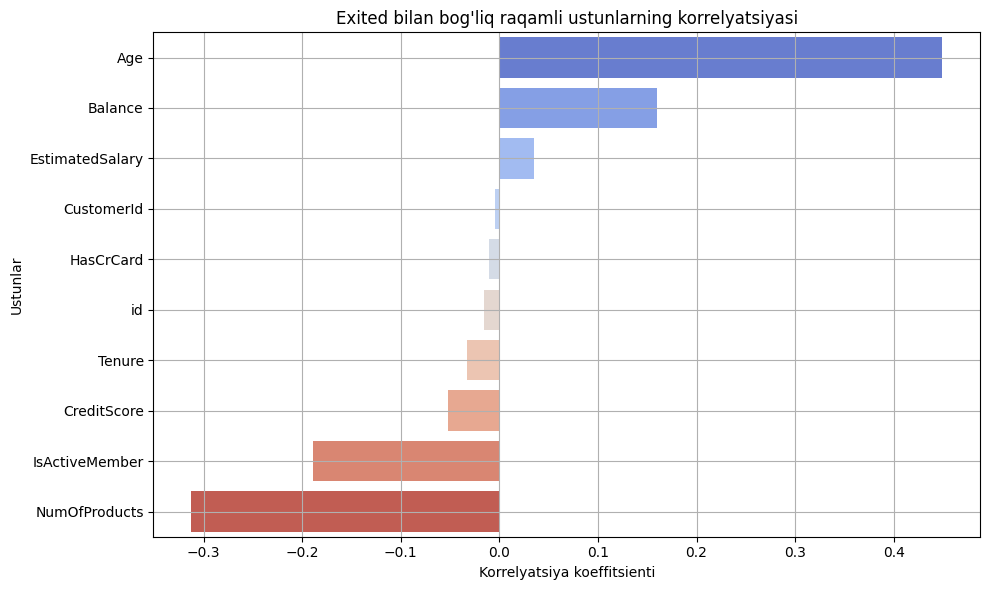

In [11]:
# Faqat raqamli ustunlarni tanlab olamiz
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Faqat Exited bilan bog'liq korrelyatsiyalarni olamiz
correlation_with_exited = numeric_df.corr()['Exited'].drop('Exited')  # O'zini olib tashlaymiz

# Korrelyatsiya jadvalini kamayish tartibida sort qilamiz
correlation_sorted = correlation_with_exited.sort_values(ascending=False)

# Korrelyatsiya jadvalini vizualizatsiya qilamiz
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.values, y=correlation_sorted.index, palette='coolwarm')
plt.title("Exited bilan bog'liq raqamli ustunlarning korrelyatsiyasi")
plt.xlabel("Korrelyatsiya koeffitsienti")
plt.ylabel("Ustunlar")
plt.grid(True)
plt.tight_layout()
plt.show()




# Prepare dataset


In [12]:
le_gender = LabelEncoder()
le_gender.fit(df['Gender'])

le_geo = LabelEncoder()
le_geo.fit(df['Geography'])


LabelEncoder()

In [13]:


# StandardScaler bilan ma'lumotlarni standartlashtiramiz (optional, ba'zi modellarda yaxshi ishlaydi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (ma'lumotlarni 80% train, 20% test qilib ajratamiz)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Models and Accurancy


In [14]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} → Accuracy: {acc:.4f}")


Logistic Regression → Accuracy: 0.8857
Random Forest → Accuracy: 0.8973
XGBoost → Accuracy: 0.8950
[LightGBM] [Info] Number of positive: 2382, number of negative: 9618
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1734
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.198500 -> initscore=-1.395696
[LightGBM] [Info] Start training from score -1.395696
LightGBM → Accuracy: 0.8993
K-Nearest Neighbors → Accuracy: 0.8747
Support Vector Machine → Accuracy: 0.8927


In [15]:
test_df = pd.read_csv("/kaggle/input/binaryclassificationwithabankchurndataset/test.csv")
test_df.sample(5)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3159,18159,15605020.0,Lucchese,651.0,France,Female,51.0,9.0,0.00,1.0,1.0,0.0,140763.18
8466,23466,15602282.0,Pagnotto,685.0,Germany,Male,46.0,8.0,81247.18,1.0,1.0,1.0,92748.16
1393,16393,15743976.0,Chukwuemeka,593.0,France,Male,38.0,4.0,0.00,2.0,1.0,1.0,167984.72
5202,20202,15797329.0,Kuykendall,727.0,France,Female,39.0,3.0,0.00,2.0,0.0,1.0,136902.01
1261,16261,15761487.0,Ch'ien,711.0,France,Female,42.0,8.0,0.00,2.0,1.0,1.0,116081.93


In [16]:
X_test_final = test_df.drop(['id', 'CustomerId', 'Surname'], axis=1)


In [17]:
X_test_final['Gender'] = le_gender.transform(X_test_final['Gender'])
X_test_final['Geography'] = le_geo.transform(X_test_final['Geography'])


In [18]:
X_test_final['AgeBalanceRatio'] = X_test_final['Balance'] / (X_test_final['Age'] + 1)
X_test_final['IsSenior'] = (X_test_final['Age'] > 50).astype(int)
X_test_final['HasHighBalance'] = (X_test_final['Balance'] > 100000).astype(int)
X_test_final['ProductsPerYear'] = X_test_final['NumOfProducts'] / (X_test_final['Tenure'] + 1)
X_test_final['CreditScorePerProduct'] = X_test_final['CreditScore'] / (X_test_final['NumOfProducts'] + 1)
X_test_final['Age_Products_Ratio'] = X_test_final['Age'] / (X_test_final['NumOfProducts'] + 1)
X_test_final['Products_Per_Age'] = X_test_final['NumOfProducts'] * 100 / X_test_final['Age']
X_test_final['Age_x_Products'] = X_test_final['Age'] * X_test_final['NumOfProducts']
X_test_final['Active_by_CreditCard'] = X_test_final['HasCrCard'] * X_test_final['IsActiveMember']
X_test_final['Products_Per_Tenure'] = X_test_final['Tenure'] / (X_test_final['NumOfProducts'] + 1)


In [19]:
X_test_scaled = scaler.transform(X_test_final)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # 👈 Bu qator muhim!

# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the final result
print(f"Best Model: Random Forest Classifier")
print(f"Model Accuracy: {accuracy:.4f}")


Best Model: Random Forest Classifier
Model Accuracy: 0.8973


In [21]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Export the results to a CSV file
results_df.to_csv('/kaggle/working/model_results.csv', index=False)

# Print a confirmation message
print("The results have been saved to 'model_results.csv'.")

The results have been saved to 'model_results.csv'.
